In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
import cv2

# Input image
image = cv2.imread('OIP.jpg')
image = cv2.resize(image, (720, 640))


In [3]:
# Importing Models and set mean values
face1 = "opencv_face_detector.pbtxt"
face2 = "opencv_face_detector_uint8.pb"
age1 = "age_deploy.prototxt"
age2 = "age_net.caffemodel"
gen1 = "gender_deploy.prototxt"
gen2 = "gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

# Using models
# Face
face = cv2.dnn.readNet(face2, face1)

# age
age = cv2.dnn.readNet(age2, age1)

# gender
gen = cv2.dnn.readNet(gen2, gen1)

In [4]:
# Categories of distribution
la = ['(0-2)', '(4-6)', '(8-12)', '(15-20)',
      '(25-32)', '(38-43)', '(48-53)', '(60-100)']
lg = ['Male', 'Female']

In [5]:
# Copy image
fr_cv = image.copy()

In [6]:
# Face detection
fr_h = fr_cv.shape[0]
fr_w = fr_cv.shape[1]
blob = cv2.dnn.blobFromImage(fr_cv, 1.0, (300, 300),
                             [104, 117, 123], True, False)

face.setInput(blob)
detections = face.forward()

In [7]:
# Face bounding box creation
faceBoxes = []
for i in range(detections.shape[2]):

    #Bounding box creation if confidence > 0.7
    confidence = detections[0, 0, i, 2]
    if confidence > 0.7:

        x1 = int(detections[0, 0, i, 3]*fr_w)
        y1 = int(detections[0, 0, i, 4]*fr_h)
        x2 = int(detections[0, 0, i, 5]*fr_w)
        y2 = int(detections[0, 0, i, 6]*fr_h)

        faceBoxes.append([x1, y1, x2, y2])

        cv2.rectangle(fr_cv, (x1, y1), (x2, y2),
                      (0, 255, 0), int(round(fr_h/150)), 8)

faceBoxes

[[288, 210, 334, 295], [356, 233, 403, 307]]

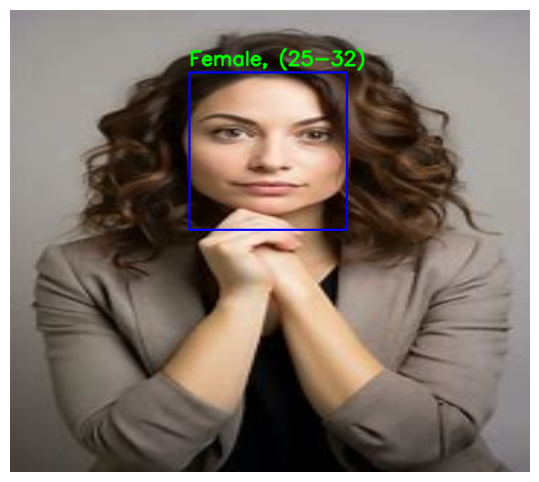

In [8]:
import cv2
import matplotlib.pyplot as plt

# Load models
age_net = cv2.dnn.readNetFromCaffe('age_deploy.prototxt', 'age_net.caffemodel')
gender_net = cv2.dnn.readNetFromCaffe('gender_deploy.prototxt', 'gender_net.caffemodel')

# Labels
AGE_LABELS = ['(0-2)', '(4-6)', '(8-12)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
GENDER_LABELS = ['Male', 'Female']

# Mean values used for model input
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

# Load image
image_path = 'women.jpg'  # Make sure this file exists in your working directory
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image '{image_path}' not found.")
fr_cv = cv2.resize(image, (720, 640))

# Use Haarcascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(fr_cv, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

if len(faces) == 0:
    print("No face detected")
else:
    for (x, y, w, h) in faces:
        face = fr_cv[y:y+h, x:x+w]

        # Preprocess face
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

        # Gender prediction
        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        gender = GENDER_LABELS[gender_preds[0].argmax()]

        # Age prediction
        age_net.setInput(blob)
        age_preds = age_net.forward()
        age = AGE_LABELS[age_preds[0].argmax()]

        # Annotate result
        label = f"{gender}, {age}"
        cv2.rectangle(fr_cv, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(fr_cv, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2, cv2.LINE_AA)

# Show the final image
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(fr_cv, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
